# Mexico City's crime exploratory analysis

In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt

### A. Data collection

In [2]:
## Import data from FGJ open cases CSV file
## Reference: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f
FGJ_data = pd.read_csv('data/carpetas_completa_septiembre_2021.csv', low_memory=False)

### B. Data exploration

In [3]:
FGJ_data.head(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN


In [4]:
FGJ_data.tail(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1307208,2021.0,Septiembre,2021-09-07 20:47:00,2021,Septiembre,2021-09-30 23:54:06,DAÑO EN PROPIEDAD AJENA CULPOSA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-6,UI-2CD,DELITO DE BAJO IMPACTO,CALZADA IGNACIO ZARAGOZA,NaN,AREA FEDERAL PARQUE ECOLOGICO EL SALADO,IZTAPALAPA,FUERO COMUN,-99.009789,19.368632,NaN
1307209,2021.0,Septiembre,2021-09-03 17:10:00,2021,Septiembre,2021-09-30 23:54:18,ROBO A REPARTIDOR CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,UAT-GAM-2,UI-1SD,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ZACAPOAXTLA,NaN,SAN FELIPE DE JESÚS,GUSTAVO A MADERO,FUERO COMUN,-99.069949,19.491604,NaN
1307210,2021.0,Septiembre,2021-09-30 23:20:00,2021,Septiembre,2021-09-30 23:54:45,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN AZCAP...,AZ-2,UI-2CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,CALZADA SANTIAGO AHUIZOTLA,MORELOS,SANTIAGO AHUIZOTLA,AZCAPOTZALCO,FUERO COMUN,-99.209475,19.476235,NaN


In [5]:
FGJ_data.shape

(1307211, 19)

In [6]:
FGJ_data.describe()

,ao_hechos,ao_inicio,longitud,latitud,tempo
count,1.306767e+06,1.307211e+06,1.253509e+06,1.253509e+06,0.0
mean,2.018268e+03,2.018419e+03,-9.913722e+01,1.938718e+01,NaN
std,1.914601e+00,1.612246e+00,6.000810e-02,7.006171e-02,NaN
min,1.906000e+03,2.016000e+03,-1.002319e+02,1.909535e+01,NaN
25%,2.017000e+03,2.017000e+03,-9.917561e+01,1.933937e+01,NaN
50%,2.018000e+03,2.018000e+03,-9.914208e+01,1.938967e+01,NaN
75%,2.020000e+03,2.020000e+03,-9.909959e+01,1.943776e+01,NaN
max,2.021000e+03,2.021000e+03,-9.894686e+01,1.958333e+01,NaN


In [7]:
FGJ_data.isna().any()

ao_hechos                True
mes_hechos               True
fecha_hechos             True
ao_inicio               False
mes_inicio              False
fecha_inicio             True
delito                  False
fiscalia                 True
agencia                 False
unidad_investigacion     True
categoria_delito        False
calle_hechos             True
calle_hechos2            True
colonia_hechos           True
alcaldia_hechos          True
competencia              True
longitud                 True
latitud                  True
tempo                    True
dtype: bool

In [8]:
FGJ_data.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

In [9]:
FGJ_data[['delito', 'fiscalia', 'agencia','categoria_delito','alcaldia_hechos','competencia']].nunique()

delito              345
fiscalia             73
agencia             209
categoria_delito     18
alcaldia_hechos     557
competencia           3
dtype: int64

In [10]:
FGJ_data.delito.value_counts()

VIOLENCIA FAMILIAR                                         137582
FRAUDE                                                      82032
ROBO DE OBJETOS                                             75973
AMENAZAS                                                    71595
ROBO A NEGOCIO SIN VIOLENCIA                                67547
                                                            ...  
ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) SIN VIOLENCIA         1
CONTRA LA LEY GENERAL DE EXPLOSIVOS                             1
SECUESTRO                                                       1
EJERCICIO INDEBIDO DEL PROPIO DER.                              1
CALUMNIAS                                                       1
Name: delito, Length: 345, dtype: int64

In [11]:
FGJ_data.fiscalia.value_counts()

INVESTIGACIÓN EN IZTAPALAPA                                                                             114947
INVESTIGACIÓN EN CUAUHTEMOC                                                                             114405
INVESTIGACIÓN EN GUSTAVO A. MADERO                                                                       78355
INVESTIGACIÓN EN BENITO JUÁREZ                                                                           74528
INVESTIGACIÓN EN ÁLVARO OBREGÓN                                                                          54129
                                                                                                         ...  
FISCALÍA ESPECIALIZADA PARA LA INVESTIGACIÓN DEL DELITO DE FEMINICIDIO                                     134
UNIDAD DE RECEPCION POR INTERNET                                                                            55
ESPECIALIZADA EN LA BÚSQUEDA, LOCALIZACIÓN E INVESTIGACIÓN DE PERSONAS DESAPARECIDAS                        43
F

In [12]:
FGJ_data.categoria_delito.value_counts()

DELITO DE BAJO IMPACTO                                     1026209
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         73481
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         67522
HECHO NO DELICTIVO                                           57857
ROBO A NEGOCIO CON VIOLENCIA                                 21136
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        13362
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        11469
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 9306
HOMICIDIO DOLOSO                                              7412
VIOLACIÓN                                                     7344
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       4293
ROBO A CASA HABITACIÓN CON VIOLENCIA                          3256
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       2386
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 1299
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      

In [13]:
FGJ_data.alcaldia_hechos.value_counts()

CUAUHTEMOC               203425
IZTAPALAPA               196158
GUSTAVO A MADERO         131319
BENITO JUAREZ            107516
ALVARO OBREGON            88946
                          ...  
SANTA MARIA COLOTEPEC         1
GšEMEZ                        1
TOLCAYUCA                     1
CALERA                        1
TEPETLAOXTOC                  1
Name: alcaldia_hechos, Length: 557, dtype: int64

In [14]:
FGJ_data.competencia.value_counts()

FUERO COMUN           236246
HECHO NO DELICTIVO      4341
INCOMPETENCIA           2545
Name: competencia, dtype: int64

### 1. Define analysis time frame

In [15]:
## Crime incidence for the last 20 years (number of registers in FGJ db) 
year_incidence = FGJ_data.ao_hechos.value_counts()
year_incidence[year_incidence.index >= 1991].sort_index(ascending=False)

2021.0    155919
2020.0    201527
2019.0    243898
2018.0    254013
2017.0    227268
2016.0    195010
2015.0     15993
2014.0      4313
2013.0      2204
2012.0      1577
2011.0      1080
2010.0       903
2009.0       499
2008.0       482
2007.0       327
2006.0       268
2005.0       199
2004.0       169
2003.0       118
2002.0       113
2001.0       203
2000.0       112
1999.0        48
1998.0        60
1997.0        41
1996.0        31
1995.0        33
1994.0        24
1993.0        27
1992.0        35
1991.0        18
Name: ao_hechos, dtype: int64

In [16]:
FGJ_data[['ao_hechos','mes_hechos','competencia']].loc[FGJ_data['ao_hechos'] > 2000].sort_values(['ao_hechos','mes_hechos']).shape

(1306083, 3)

In [17]:
FGJ_data[['ao_hechos','mes_hechos','competencia']].loc[FGJ_data['ao_hechos'] > 2000].dropna().sort_values(['ao_hechos','mes_hechos']).shape

(242919, 3)

In [18]:
FGJ_data.loc[(FGJ_data['ao_hechos'] >= 2014) & (FGJ_data['ao_hechos'] <= 2017)].groupby(['ao_hechos','mes_hechos']).count()['delito']

ao_hechos  mes_hechos
2014.0     Abril           323
           Agosto          323
           Diciembre       426
           Enero           331
           Febrero         256
           Julio           337
           Junio           327
           Marzo           326
           Mayo            469
           Noviembre       392
           Octubre         449
           Septiembre      354
2015.0     Abril           696
           Agosto         1143
           Diciembre      3563
           Enero          1143
           Febrero         707
           Julio           946
           Junio           983
           Marzo           737
           Mayo            884
           Noviembre      2134
           Octubre        1723
           Septiembre     1334
2016.0     Abril         16413
           Agosto        16623
           Diciembre     16144
           Enero         15171
           Febrero       15505
           Julio         15477
           Junio         15260
           Marzo 

In [20]:
FGJ_data.loc[(FGJ_data['ao_inicio'] >= 2014) & (FGJ_data['ao_inicio'] <= 2017)].groupby(['ao_inicio','mes_inicio']).count()['delito']

ao_inicio  mes_inicio
2016       Abril         16992
           Agosto        16924
           Diciembre     16531
           Enero         14778
           Febrero       15515
           Julio         15774
           Junio         16230
           Marzo         16270
           Mayo          16857
           Noviembre     17003
           Octubre       17901
           Septiembre    17138
2017       Abril         17228
           Agosto        20688
           Diciembre     19109
           Enero         17449
           Febrero       16304
           Julio         19450
           Junio         19876
           Marzo         18522
           Mayo          19942
           Noviembre     19965
           Octubre       21095
           Septiembre    18695
Name: delito, dtype: int64

In [21]:
FGJ_data.loc[(FGJ_data['ao_hechos'] >= 2014) & (FGJ_data['ao_hechos'] <= 2017)]['alcaldia_hechos'].value_counts()

CUAUHTEMOC          74079
IZTAPALAPA          64742
GUSTAVO A MADERO    43214
BENITO JUAREZ       38756
COYOACAN            30170
                    ...  
XALATLACO               1
PARRAS                  1
EBANO                   1
TENOSIQUE               1
TEPETLAOXTOC            1
Name: alcaldia_hechos, Length: 367, dtype: int64

### C. Clean dataset

In [22]:
print(FGJ_data.shape)

(1307211, 19)


In [23]:
FGJ_data.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'calle_hechos2', 'colonia_hechos',
       'alcaldia_hechos', 'competencia', 'longitud', 'latitud', 'tempo'],
      dtype='object')

In [24]:
## Select columns for clean dataset
columns = ['ao_hechos', 'mes_hechos', 'fecha_hechos', 'delito', 'categoria_delito',
           'colonia_hechos', 'alcaldia_hechos', 'longitud', 'latitud']

## Build clean dataset according to defined analysis timeframe (2016-2021) 
FGJ_clean = FGJ_data.loc[(FGJ_data['ao_hechos'] >= 2016)][columns]
print(FGJ_clean.shape)

(1277635, 9)


In [25]:
## Convert timestamp to datetimeindex
FGJ_clean['fecha_hechos'] = pd.to_datetime(FGJ_clean.fecha_hechos.values)

In [26]:
## Set datetimeindex
FGJ_clean.set_index('fecha_hechos', inplace=True)

In [27]:
## FGJ_clean.categoria_delito.value_counts()

In [28]:
FGJ_clean.alcaldia_hechos.value_counts().head(20)

CUAUHTEMOC                195149
IZTAPALAPA                193014
GUSTAVO A MADERO          129141
BENITO JUAREZ             104641
ALVARO OBREGON             87552
COYOACAN                   85670
MIGUEL HIDALGO             82574
TLALPAN                    75262
VENUSTIANO CARRANZA        73839
AZCAPOTZALCO               62425
IZTACALCO                  53469
XOCHIMILCO                 40365
TLAHUAC                    31930
LA MAGDALENA CONTRERAS     21128
CUAJIMALPA DE MORELOS      19047
MILPA ALTA                  9408
NEZAHUALCOYOTL              1373
TLALNEPANTLA DE BAZ         1060
ECATEPEC DE MORELOS          989
NAUCALPAN DE JUAREZ          756
Name: alcaldia_hechos, dtype: int64

In [29]:
## Get alcaldias list
alcaldias_list = FGJ_clean.alcaldia_hechos.value_counts().head(16).index
alcaldias_list

Index(['CUAUHTEMOC', 'IZTAPALAPA', 'GUSTAVO A MADERO', 'BENITO JUAREZ',
       'ALVARO OBREGON', 'COYOACAN', 'MIGUEL HIDALGO', 'TLALPAN',
       'VENUSTIANO CARRANZA', 'AZCAPOTZALCO', 'IZTACALCO', 'XOCHIMILCO',
       'TLAHUAC', 'LA MAGDALENA CONTRERAS', 'CUAJIMALPA DE MORELOS',
       'MILPA ALTA'],
      dtype='object')

In [30]:
## Filter by alcaldias list
FGJ_alcaldias = FGJ_clean.loc[FGJ_clean['alcaldia_hechos'].isin(alcaldias_list)]

In [31]:
print(FGJ_alcaldias.shape)
FGJ_alcaldias.head(3)

(1264614, 8)


,ao_hechos,mes_hechos,delito,categoria_delito,colonia_hechos,alcaldia_hechos,longitud,latitud
fecha_hechos,,,,,,,,
2016-01-31 22:16:00,2016.0,Enero,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DELITO DE BAJO IMPACTO,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315
2016-01-31 20:50:00,2016.0,Enero,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859
2016-02-01 00:30:00,2016.0,Febrero,NARCOMENUDEO POSESION SIMPLE,DELITO DE BAJO IMPACTO,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451


### 2. Increasing / decreasing crime rates

In [32]:
## Build crime list
delitos_list = FGJ_alcaldias.delito.value_counts().index

In [33]:
## Build crime rate change DF for last year
crime_rate = pd.DataFrame(delitos_list.sort_values())
crime_rate.set_index(delitos_list.sort_values(), inplace=True)
crime_rate.drop(0, axis=1, inplace=True)

crime_rate['Sep-2020'] = FGJ_alcaldias.loc[(FGJ_alcaldias.ao_hechos == 2020)&(FGJ_alcaldias.mes_hechos == 'Septiembre')].delito.value_counts()
crime_rate['Ago-2021'] = FGJ_alcaldias.loc[(FGJ_alcaldias.ao_hechos == 2021)&(FGJ_alcaldias.mes_hechos == 'Agosto')].delito.value_counts()

crime_rate.dropna(inplace=True)
crime_rate = crime_rate.loc[(crime_rate['Sep-2020'] >= 50) & (crime_rate['Ago-2021'] >= 50)]

crime_rate['Pct_Change'] = (crime_rate['Ago-2021'] - crime_rate['Sep-2020'])/crime_rate['Sep-2020']

In [34]:
## Top 5 crime increase rate
crime_rate.sort_values(['Pct_Change'], ascending=False).head(5)

,Sep-2020,Ago-2021,Pct_Change
ROBO A NEGOCIO CON VIOLENCIA,95.0,185.0,0.947368
ROBO DE MOTOCICLETA SIN VIOLENCIA,79.0,127.0,0.607595
"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COMERCIO Y SUMINISTRO",96.0,154.0,0.604167
CONTRA LA INTIMIDAD SEXUAL,75.0,116.0,0.546667
DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,78.0,118.0,0.512821


In [35]:
## Top 5 crime decrease rate
crime_rate.sort_values(['Pct_Change'], ascending=False).tail(5)

,Sep-2020,Ago-2021,Pct_Change
ENCUBRIMIENTO,150.0,91.0,-0.393333
ROBO A REPARTIDOR CON VIOLENCIA,137.0,82.0,-0.401460
"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE",208.0,114.0,-0.451923
SUSTRACCIÓN DE MENORES,107.0,53.0,-0.504673
TENTATIVA DE EXTORSION,228.0,101.0,-0.557018


### 3. Crime count by Alcaldía

In [36]:
FGJ_alcaldias.groupby(['alcaldia_hechos']).count()['delito'].sort_values(ascending=False)

alcaldia_hechos
CUAUHTEMOC                195149
IZTAPALAPA                193014
GUSTAVO A MADERO          129141
BENITO JUAREZ             104641
ALVARO OBREGON             87552
COYOACAN                   85670
MIGUEL HIDALGO             82574
TLALPAN                    75262
VENUSTIANO CARRANZA        73839
AZCAPOTZALCO               62425
IZTACALCO                  53469
XOCHIMILCO                 40365
TLAHUAC                    31930
LA MAGDALENA CONTRERAS     21128
CUAJIMALPA DE MORELOS      19047
MILPA ALTA                  9408
Name: delito, dtype: int64

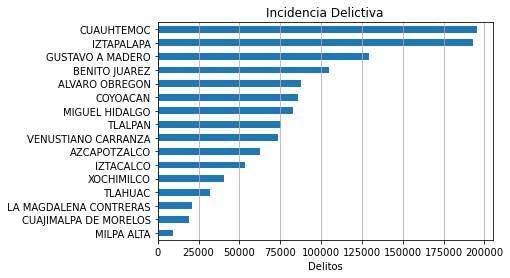

In [110]:
FGJ_alcaldias.groupby(['alcaldia_hechos']).count()['delito'].sort_values().plot(
    kind='barh',
    title="Incidencia Delictiva")

plt.xlabel('Delitos')
plt.ylabel('')
plt.grid(True, which='both', axis='x')
plt.show()

### 4. Crime rate by Alcaldía

In [38]:
## Build crime rate change DF for last year
alcaldias_rate = pd.DataFrame(alcaldias_list.sort_values())
alcaldias_rate.set_index(alcaldias_list.sort_values(), inplace=True)
alcaldias_rate.drop(0, axis=1, inplace=True)

alcaldias_rate['Sep-2020'] = FGJ_alcaldias[(FGJ_alcaldias.ao_hechos == 2020)&(FGJ_alcaldias.mes_hechos == 'Septiembre')].groupby(['alcaldia_hechos']).count()['delito']
alcaldias_rate['Ago-2021'] = FGJ_alcaldias[(FGJ_alcaldias.ao_hechos == 2021)&(FGJ_alcaldias.mes_hechos == 'Agosto')].groupby(['alcaldia_hechos']).count()['delito']

alcaldias_rate['Pct_Change'] = (alcaldias_rate['Ago-2021'] - alcaldias_rate['Sep-2020'])/alcaldias_rate['Sep-2020']

In [39]:
alcaldias_rate

,Sep-2020,Ago-2021,Pct_Change
ALVARO OBREGON,1243,1134,-0.087691
AZCAPOTZALCO,883,902,0.021518
BENITO JUAREZ,1232,1214,-0.014610
COYOACAN,1106,1151,0.040687
CUAJIMALPA DE MORELOS,292,292,0.000000
CUAUHTEMOC,2375,2451,0.032000
GUSTAVO A MADERO,1827,1840,0.007115
IZTACALCO,630,747,0.185714
IZTAPALAPA,2551,2456,-0.037240
LA MAGDALENA CONTRERAS,373,318,-0.147453


In [40]:
## Top 5 crime increase rate (least decrease rate)
alcaldias_rate.sort_values(['Pct_Change'], ascending=False).head(5)

,Sep-2020,Ago-2021,Pct_Change
IZTACALCO,630,747,0.185714
COYOACAN,1106,1151,0.040687
CUAUHTEMOC,2375,2451,0.032000
MILPA ALTA,175,179,0.022857
AZCAPOTZALCO,883,902,0.021518


In [41]:
## Top 5 crime decrease rate
alcaldias_rate.sort_values(['Pct_Change'], ascending=False).tail(5)

,Sep-2020,Ago-2021,Pct_Change
XOCHIMILCO,599,561,-0.063439
MIGUEL HIDALGO,1049,981,-0.064824
TLAHUAC,501,464,-0.073852
ALVARO OBREGON,1243,1134,-0.087691
LA MAGDALENA CONTRERAS,373,318,-0.147453


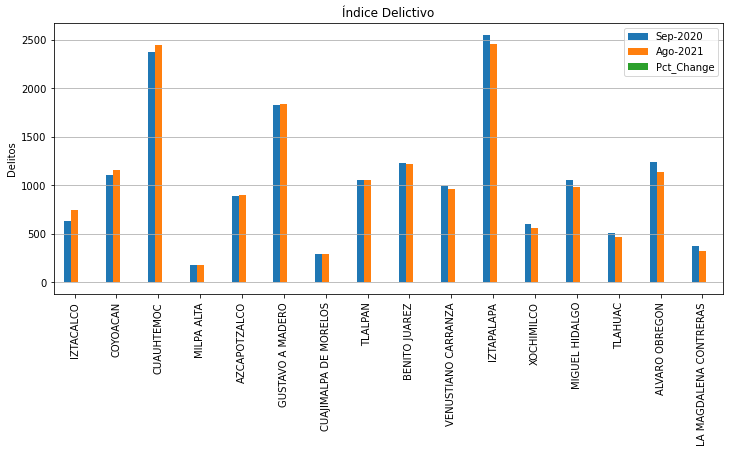

In [119]:
alcaldias_rate.sort_values(['Pct_Change'], ascending=False).plot(
    kind='bar',
    figsize=(12,5),
    title="Índice Delictivo")

plt.xlabel('')
plt.ylabel('Delitos')
plt.grid(True, which='both', axis='y')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### 5. Distinctive crimes by Alcaldía

In [43]:
len(delitos_list)

344

In [44]:
top_delitos = FGJ_alcaldias.groupby('delito').count()['ao_hechos'].sort_values(ascending=False).head(10).index
top_delitos

Index(['VIOLENCIA FAMILIAR', 'ROBO DE OBJETOS', 'FRAUDE', 'AMENAZAS',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'DENUNCIA DE HECHOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA'],
      dtype='object', name='delito')

In [45]:
distinctive_crimes = pd.DataFrame(columns = [alcaldias_list.sort_values()], index = top_delitos.sort_values())

In [46]:
for alcaldia in alcaldias_list:
    distinctive_crimes[alcaldia] = FGJ_alcaldias[FGJ_alcaldias['alcaldia_hechos'] == alcaldia].groupby(['delito'])['ao_hechos'].count()

In [104]:
distinctive_crimes

,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
delito,,,,,,,,,,,,,,,,
AMENAZAS,5203,4181,4239,4841,892,9118,7274,3067,11284,1747,3395,668,2322,5019,4530,2952
DENUNCIA DE HECHOS,2375,1236,2542,2699,353,7413,3491,1740,5232,505,1899,134,540,1702,3335,609
FRAUDE,4642,2973,9824,5212,1462,17747,5398,2217,6402,886,7130,288,1071,3941,2968,1514
ROBO A NEGOCIO SIN VIOLENCIA,4387,4057,7874,5431,1288,10810,7028,1381,10432,463,4715,166,608,4003,3357,1125
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,3990,3343,3664,3335,299,9852,6445,3406,12613,558,5450,223,1632,2157,4461,2168
ROBO DE ACCESORIOS DE AUTO,2147,2097,8660,3334,245,7467,3985,1761,3344,429,2461,77,418,2319,2245,590
ROBO DE OBJETOS,4605,3717,6434,5885,1159,14395,5999,2561,9714,875,6443,333,1380,4647,4670,1765
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,3349,2226,4128,3975,570,3806,2509,1530,3978,492,3640,78,380,2635,1511,964
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,2306,1860,2748,2781,281,1827,4303,1513,5699,564,1470,274,1018,2399,1527,1649


In [120]:
## Compute proportional crime rates
for alcaldia in alcaldias_list:
    distinctive_crimes[alcaldia] = distinctive_crimes[alcaldia] / distinctive_crimes[alcaldia].sum() 

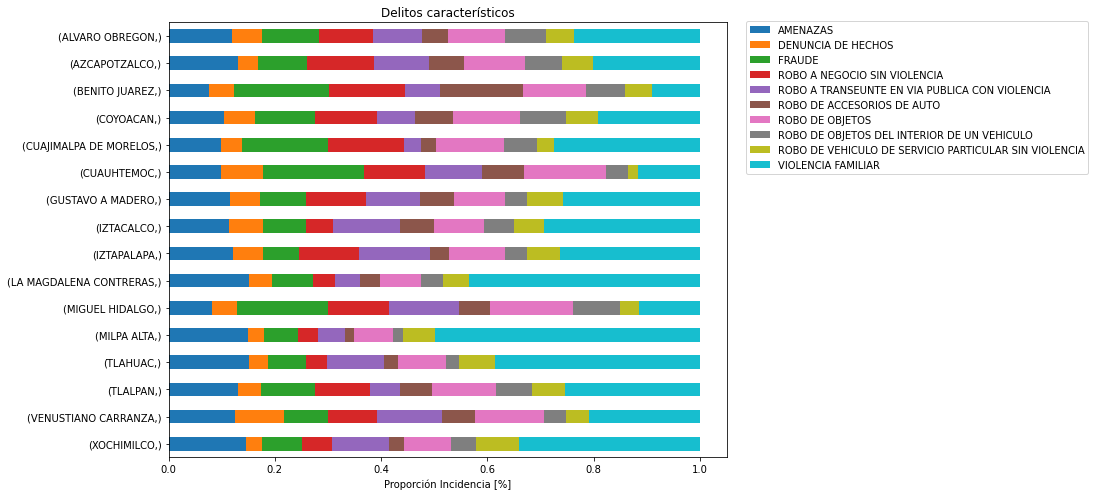

In [143]:
distinctive_crimes.T.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10,8),
    stacked=True,
    legend=True,
    title="Delitos característicos")

plt.xlabel('Proporción Incidencia [%]')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.025,1.015))
plt.show()

In [128]:
# distinctive_crimes.sort_index(ascending=False).plot(kind='barh', stacked=True, legend=True)
# plt.legend(bbox_to_anchor=(1.2,1.05))
# plt.show()

### 6. Crime seasonality

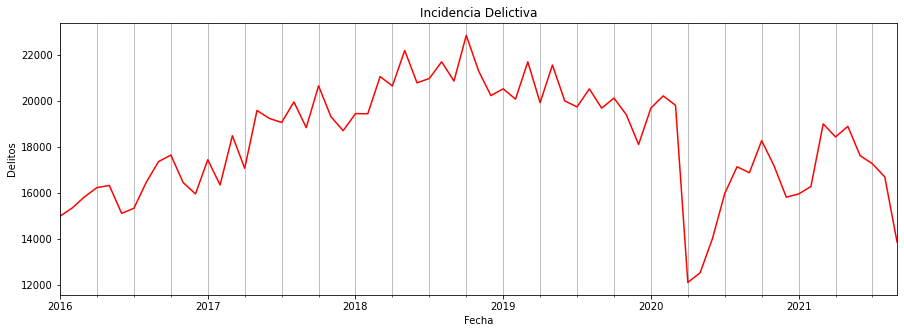

In [90]:
FGJ_alcaldias.groupby([pd.Grouper(freq='m')]).count()['delito'].plot(
    kind='line',
    figsize=(15,5),
    color='red',
    title='Incidencia Delictiva')

plt.xlabel('Fecha')
plt.ylabel('Delitos')
plt.grid(True, which='both', axis='x')
plt.show()

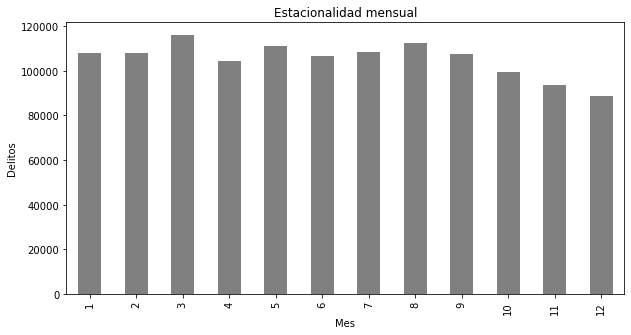

In [80]:
FGJ_alcaldias.groupby(FGJ_alcaldias.index.month).count()['delito'].plot(
    kind='bar',
    figsize=(10,5),
    color='gray',
    title='Estacionalidad por mes')

plt.xlabel('Mes')
plt.ylabel('Delitos')
plt.show()

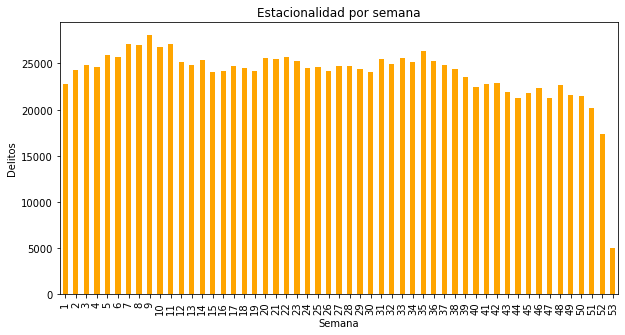

In [144]:
FGJ_alcaldias.groupby(FGJ_alcaldias.index.isocalendar().week).count()['delito'].plot(
    kind='bar',
    figsize=(10,5),
    color='orange',
    title='Estacionalidad por semana')

plt.xlabel('Semana')
plt.ylabel('Delitos')
plt.show()

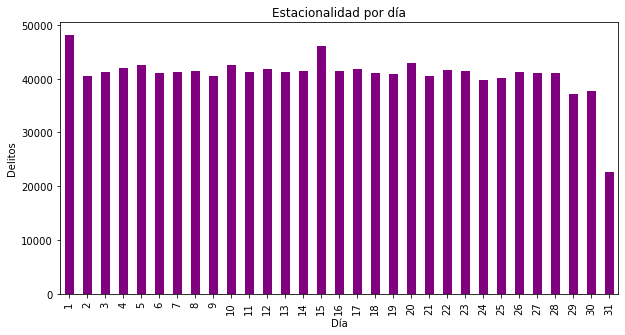

In [82]:
FGJ_alcaldias.groupby(FGJ_alcaldias.index.day).count()['delito'].plot(
    kind='bar',
    figsize=(10,5),
    color='purple',
    title='Estacionalidad por día')

plt.xlabel('Día')
plt.ylabel('Delitos')
plt.show()

### 7. Crime concentration

In [53]:
total_delitos = len(FGJ_alcaldias)
total_colonias = len(FGJ_alcaldias['colonia_hechos'].unique())

print(f"Total delitos: {total_delitos :,}")
print(f"95% = {total_delitos * 0.95 :,.1f} delitos")
print(f"\nTotal colonias: {total_colonias :,}")
print(f"3% = {total_colonias * .03 :,.1f} colonias")

Total delitos: 1,264,614
95% = 1,201,383.3 delitos

Total colonias: 1,642
3% = 49.3 colonias


In [55]:
delitos_50 = FGJ_alcaldias.groupby('colonia_hechos').count()['delito'].sort_values(ascending=False).head(50).values.sum()

print(f"Delitos (50 colonias): {delitos_50:,}")
print(f"Concentración (50 colonias) = {delitos_50 / total_delitos * 100 :.1f}%")

Delitos (50 colonias): 382,240
Concentración (50 colonias) = 30.2%


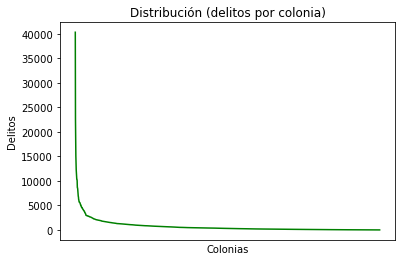

In [76]:
FGJ_alcaldias.groupby('colonia_hechos').count()['delito'].sort_values(ascending=False).plot(
    kind='line',
    color='green',
    title="Distribución (delitos por colonia)",
    xticks=[])

plt.xlabel('Colonias')
plt.ylabel('Delitos')
plt.show()